# 1) Повторення дій з пункту «Часові ряди і проста лінійна регресія ч. 2» та порівняння з результатами попередньої роботи

Завантажую досліджувані дані у датафрейм

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nyc = pd.read_csv('nyc_1895_2018.csv')

In [3]:
nyc.head()

,Date,Value,Anomaly
0,189501,29.8,-1.8
1,189601,28.6,-3.0
2,189701,29.4,-2.2
3,189801,34.0,2.4
4,189901,30.0,-1.6


Перейменовую стовпець 'Value' та позбуваюсь 01 в Date

In [4]:
nyc.columns = ['Date','Temperature','Anomaly']

In [5]:
nyc.Date = nyc.Date.floordiv(100)

In [6]:
nyc.head()

,Date,Temperature,Anomaly
0,1895,29.8,-1.8
1,1896,28.6,-3.0
2,1897,29.4,-2.2
3,1898,34.0,2.4
4,1899,30.0,-1.6


Розбиваю дані на навчальний і тестові набори

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state = 11)

Перевіримо пропорції (повинно бути 75% і 25%)

In [8]:
X_train.shape

(93, 1)

In [9]:
X_test.shape

(31, 1)

Скористаємось оцінювачем LinearRegression

In [10]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X = X_train, y = Y_train)

LinearRegression()

y = mx + b, m = linear_regression.coef_, b = linear_regression.intercept

In [11]:
linear_regression.coef_

array([0.02791456])

In [12]:
linear_regression.intercept_

-22.804760008455318

Протестуємо модель з даними і перевіримо прогнози. Виводитимемо прогнозовані і очікувані значення для кожного третього елементу

In [13]:
predicted = linear_regression.predict(X_test)
expected = Y_test

for p, e in zip(predicted[::3], expected[::3]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 32.13, expected: 26.20
predicted: 30.34, expected: 23.90
predicted: 30.09, expected: 29.80
predicted: 31.66, expected: 35.70
predicted: 31.18, expected: 33.90
predicted: 31.27, expected: 39.50
predicted: 32.55, expected: 33.60
predicted: 30.93, expected: 27.70
predicted: 30.51, expected: 30.10
predicted: 32.49, expected: 25.30
predicted: 30.82, expected: 33.10


Прогнозування майбутніх температур і оцінка минулих температур

Створимо прогноз середньої температури в січні 2024 та оцінку середньої температури у січні 1890 року

In [14]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [15]:
predict(1890)

array([29.95376178])

In [16]:
predict(2024)

array([33.69431306])

Порівняємо отримані дані з прогнозом і оцінкою створеними у попередній роботі

Відтворимо прогнозні дані з попередньої роботи

In [17]:
from scipy import stats

linear_regres = stats.linregress(x = nyc.Date, y = nyc.Temperature)

In [18]:
years = list(range(2019, 2025))

for x in years:
    predicted_temp = linear_regres.slope * x + linear_regres.intercept
    print("Для ", x, " року прогнозується температура: ", predicted_temp)

Для  2019  року прогнозується температура:  33.28308418568058
Для  2020  року прогнозується температура:  33.30634901652243
Для  2021  року прогнозується температура:  33.329613847364286
Для  2022  року прогнозується температура:  33.35287867820614
Для  2023  року прогнозується температура:  33.376143509048006
Для  2024  року прогнозується температура:  33.39940833988986


Для цього ж переліку років, застосуємо прогнозування з допомогою розробленої функції predict

In [19]:
years = list(range(2019, 2025))

for x in years:
    print("Для ", x, " року прогнозується температура: ", predict(x))

Для  2019  року прогнозується температура:  [33.55474025]
Для  2020  року прогнозується температура:  [33.58265481]
Для  2021  року прогнозується температура:  [33.61056937]
Для  2022  року прогнозується температура:  [33.63848393]
Для  2023  року прогнозується температура:  [33.6663985]
Для  2024  року прогнозується температура:  [33.69431306]


Отримані результати показують, що прогнози значно збігаються, проте predict показує дещо вищий показник

Дослідимо оцінку температури у 1890-1895 роках за допомогою методом з попередньох роботи

In [20]:
years = list(range(1890, 1895))

for x in years:
    predicted_temp = linear_regres.slope * x + linear_regres.intercept
    print("Оцінка можливої температури ", x, " року: ", predicted_temp)

Оцінка можливої температури  1890  року:  30.281921007081042
Оцінка можливої температури  1891  року:  30.305185837922902
Оцінка можливої температури  1892  року:  30.328450668764756
Оцінка можливої температури  1893  року:  30.351715499606616
Оцінка можливої температури  1894  року:  30.37498033044847


Проведемо аналогічне дослідження з допомогою розробленого методу predict

In [21]:
years = list(range(1890, 1895))

for x in years:
    print("Оцінка можливої температури ", x, " року: ", predict(x))

Оцінка можливої температури  1890  року:  [29.95376178]
Оцінка можливої температури  1891  року:  [29.98167634]
Оцінка можливої температури  1892  року:  [30.0095909]
Оцінка можливої температури  1893  року:  [30.03750546]
Оцінка можливої температури  1894  року:  [30.06542003]


Отримані оцінки схожі, проте, взагальному, оцінки отримані з допомогою predict є нижчими

Візуалізуємо набір даних з допомогою регресійної прямої

In [22]:
import seaborn as sns

D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


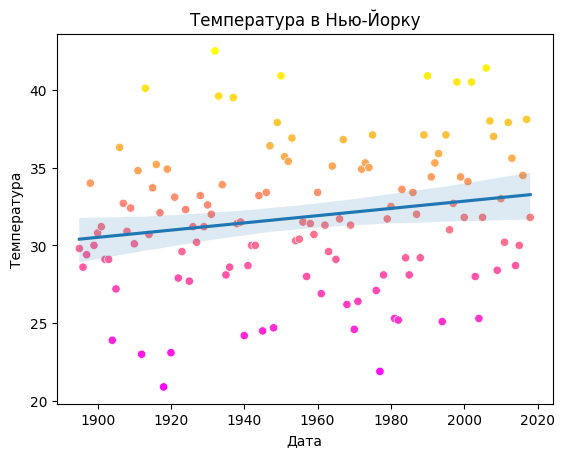

In [23]:
axes = sns.scatterplot(data=nyc, x ='Date', y ='Temperature', hue='Temperature', palette ='spring', legend=False)
sns.regplot(data=nyc, x='Date', y='Temperature', ax=axes, scatter=False)
plt.title('Температура в Нью-Йорку')
plt.xlabel('Дата')
plt.ylabel('Температура')

plt.show()

Змінимо масштаб

D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


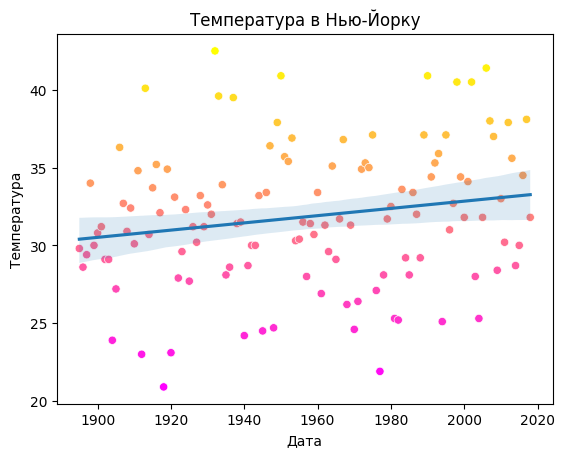

(10.0, 50.0)

In [24]:
axes = sns.scatterplot(data=nyc, x ='Date', y ='Temperature', hue='Temperature', palette ='spring', legend=False)
sns.regplot(data=nyc, x='Date', y='Temperature', ax=axes, scatter=False)
plt.title('Температура в Нью-Йорку')
plt.xlabel('Дата')
plt.ylabel('Температура')

plt.show()
axes.set_ylim(10,50)

Перейдемо до висновку регресійної прямої

In [25]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

Отримаємо масив прогнозованих значень

In [26]:
y = predict(x)

Намалюємо лінію по масивам х та y

D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


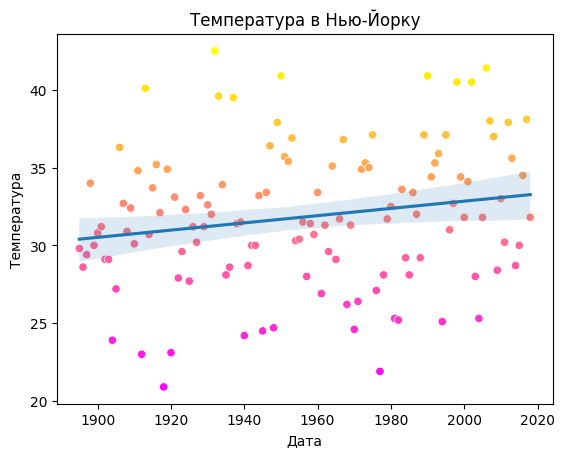

(10.0, 50.0)

In [27]:
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=nyc, x ='Date', y ='Temperature', hue='Temperature',palette ='spring', legend=False)
sns.regplot(data=nyc, x='Date', y='Temperature', ax=axes, scatter=False)
plt.title('Температура в Нью-Йорку')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.show()
axes.set_ylim(10,50)

Порівняємо нахили регресій

In [28]:
print('Нахил з роботи 2: ', linear_regres.slope) 
print('Перетин з роботи 2: ', linear_regres.intercept) 
print('\nНахил у цій роботи: ', linear_regression.coef_) 
print('Нахил у цій роботи: ', linear_regression.intercept_) 

Нахил з роботи 2:  0.023264830841856807
Перетин з роботи 2:  -13.68860928402832

Нахил у цій роботи:  [0.02791456]
Нахил у цій роботи:  -22.804760008455318


Як бачимо, нахил, отриманий у цій роботі є дещо вищим, звідси випливає, що прогнози отримані у цій роботі будуть вищими порівняно з прогнозами для тих самих років, отриманими у попередній роботі

# 2) Генерація та класифікація набору даних з допомогою SVC

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

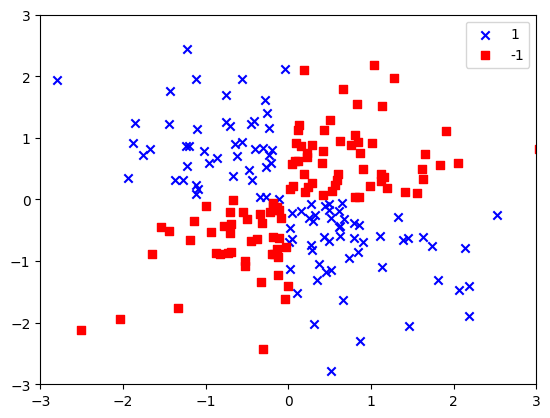

In [30]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker ='x', label ='1')

plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker ='s', label ='-1')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc ='best')
plt.show()

In [31]:
def plot_decision_regions(X,y,classifier, test_idx = None, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl)
    
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        
        plt.scatter(X_test[:,0],
                    X_test[:,1],
                    c = '',
                    edgecolor ='black',
                    alpha = 1.0,
                    linewidth = 1,
                    marker = 'o',
                    s = 100,
                    label = 'Test set')

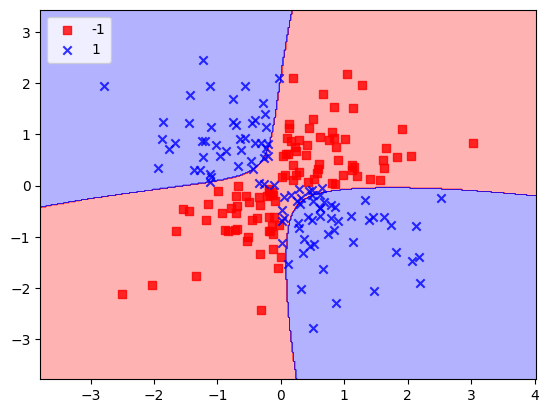

In [32]:
svm = SVC(kernel='rbf', random_state = 1, gamma = 0.10, C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.show()

# 3) Порівняння класифікаційних оцінювачів  для вбудованого датасету

In [33]:
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

Отримую дані з вбудованого датасету

In [34]:
breast_cancer_data  = load_breast_cancer ()

Досліджую дані

In [35]:
type(breast_cancer_data)

sklearn.utils._bunch.Bunch

In [36]:
breast_cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [37]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [38]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [39]:
breast_cancer_data.data.shape

(569, 30)

Будуємо візуалізацію для розуміння розподілу даних

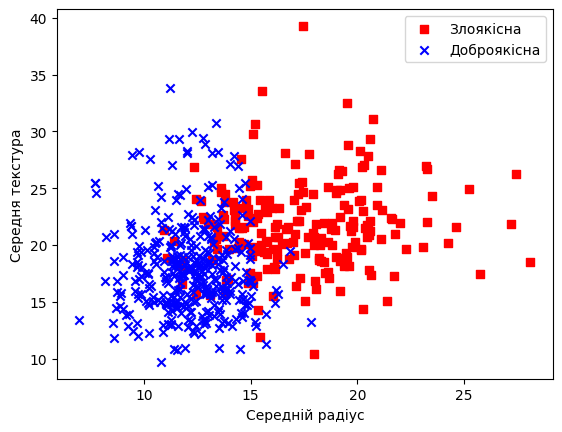

In [40]:
X = breast_cancer_data.data[:,:2]
y = breast_cancer_data.target

colors = ['r', 'b']
markers = ['s', 'x']

plt.scatter(X[y == 0, 0], X[y == 0, 1], c=colors[0], marker=markers[0], label='Злоякісна')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c=colors[1], marker=markers[1], label='Доброякісна')

plt.xlabel('Середній радіус')
plt.ylabel('Середня текстура')
plt.legend(loc='best')
plt.show()

In [41]:
def plot_decision_regions(X, y, classifiers, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    for (name, classifier) in classifiers.items():
        classifier.fit(X, y)
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=0.8,
                        c=colors[idx],
                        marker=markers[idx],
                        label='Злоякісна' if cl == 0 else 'Доброякісна')
        
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='Test set')
            
        plt.xlabel('Середній радіус')
        plt.ylabel('Середня текстура')
        plt.title(name, loc='center') 
    
    plt.legend(loc='best')
    plt.show()

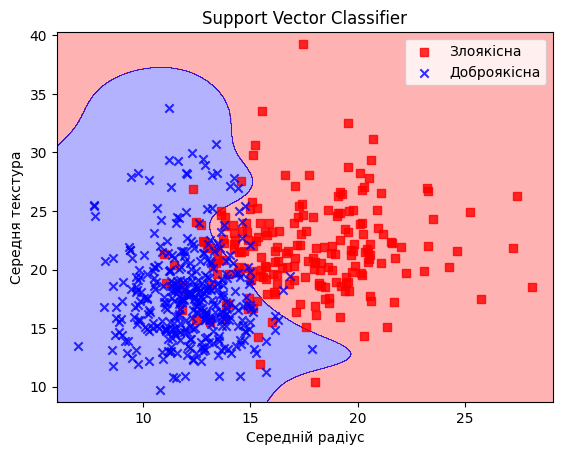

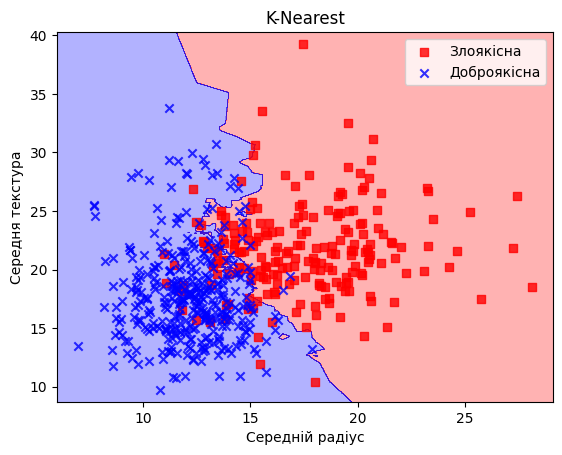

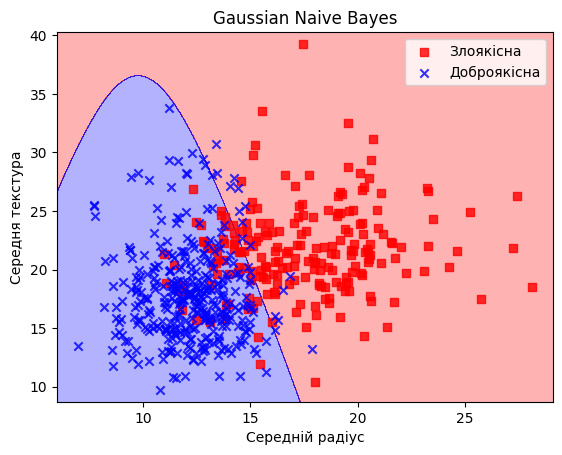

In [42]:
classifiers = {
    "Support Vector Classifier": SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0),
    "K-Nearest": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

for name, classifier in classifiers.items():
    plot_decision_regions(X, y, classifiers={name: classifier}, test_idx=None)

Оцінимо ефективність класифікації за допомогою крос-валідації

In [43]:
from sklearn.model_selection import cross_val_score

def evaluate_classifier(X, y, classifier, cv=5):
    scores = cross_val_score(classifier, X, y, cv=cv)
    print(f"Mean accuracy of {cv}-fold cross-validation: {scores.mean():.2f}")
    print(f"Standard deviation of {cv}-fold cross-validation: {scores.std():.2f}")

for name, classifier in classifiers.items():
    print(f"Evaluation for {name}:")
    evaluate_classifier(X, y, classifier)
    print()

Evaluation for Support Vector Classifier:
Mean accuracy of 5-fold cross-validation: 0.89
Standard deviation of 5-fold cross-validation: 0.03

Evaluation for K-Nearest:
Mean accuracy of 5-fold cross-validation: 0.88
Standard deviation of 5-fold cross-validation: 0.03

Evaluation for Gaussian Naive Bayes:
Mean accuracy of 5-fold cross-validation: 0.88
Standard deviation of 5-fold cross-validation: 0.03

